In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel (r'C:\Users\HP\Downloads\customer_churn_large_dataset.xlsx')

In [3]:
print (df)

       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2           

In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
df .head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016492AEFA48>,
      dtype=object)

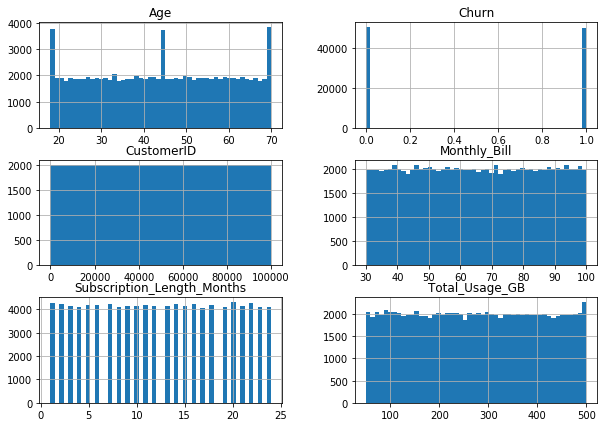

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(10,7))

In [10]:
df['CustomerID'].value_counts()

2047     1
60104    1
80562    1
78515    1
68276    1
        ..
5480     1
7529     1
1386     1
3435     1
2049     1
Name: CustomerID, Length: 100000, dtype: int64

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df=df.drop('Name',axis=1)

In [13]:
from scipy import stats

z_scores = stats.zscore(df['Monthly_Bill'])
df = df[(z_scores < 3)]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Monthly_Bill'] = label_encoder.fit_transform(df['Monthly_Bill'])


In [15]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(75000, 8)
(25000, 8)


In [16]:
train_x = train[['CustomerID','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
train_y = train.Churn

test_x = test[['CustomerID','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
test_y = test.Churn

In [17]:
train_x.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
16615,16616,47,4,6799,157
64627,64628,27,18,4379,351
11058,11059,57,12,4295,407
92018,92019,45,23,1491,163
58554,58555,28,22,4217,235


In [18]:
test_y.head()

52496    0
3591     0
66310    1
6210     0
15978    1
Name: Churn, dtype: int64

In [19]:
test_y.head()

52496    0
3591     0
66310    1
6210     0
15978    1
Name: Churn, dtype: int64

In [20]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(train_x, train_y)


y_pred = model.predict(test_x)


accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.5
Precision: 0.48861343326607093
Recall: 0.27467185221195917
F1-Score: 0.35165975103734437


In [21]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train_scaled, train_y)

y_pred1 = model1.predict(X_test_scaled)

accuracy1 = accuracy_score(test_y, y_pred1)
precision1 = precision_score(test_y, y_pred1)
recall1 = recall_score(test_y, y_pred1)
f2 = f1_score(test_y, y_pred1)

In [24]:
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1-Score: {f2}")

Accuracy: 0.49776
Precision: 0.4909917494527698
Recall: 0.4725328147788041
F1-Score: 0.48158546655656476


In [25]:
from joblib import dump,load
dump(model1,'Churn_Prediction.joblib')

['Churn_Prediction.joblib']

In [26]:
from joblib import dump,load
import numpy as np
model=load('Churn_Prediction.joblib')

In [27]:
import joblib

def predict_churn(new_data):
    
    new_data_scaled = scaler.transform(new_data)

  
    model = joblib.load('Churn_Prediction.joblib')

    predictions = model.predict(new_data_scaled)

    return predictions


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    predictions = predict_churn(data)
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Sep/2023 16:30:40] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Sep/2023 16:30:51] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Sep/2023 16:30:56] "GET / HTTP/1.1" 404 -


In [ ]:
import requests

data = {
    99996,'Customer_99996',33,'Male','Houston',23,55.13.226.1
}

response = requests.post('http://127.0.0.1:5000/predict', json=data)
predictions = response.json()['predictions']
